# Stack Overflow Survey 2019 Analysis 


## Business Understanding

I am interested in finding the answers to the following questions related to career satisfaction. 

- Are Developers satisfied with thier career?

- Who are the most satisfied developers?

- Is there is a significant relationship between compensation and career satisfaction?


In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Data Understanding

In [2]:
data = pd.read_csv('.\data\survey_results_public.csv')
data.shape

(88883, 85)

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Q1: Are developers satisfied with thier career?

### Prepare Data

Our focus is on career satisfaction of full-time developers (people who writes code), we'll filter the data accordingly and remove all na values in career satisfaction column in order to get more accurate results. 

In [5]:
careerSat_data =  data[(~ data['CareerSat'].isna()) 
                       & (data['Employment'] == 'Employed full-time') 
                       & (data['MainBranch'] == 'I am a developer by profession')]
careerSat_data.shape

(55405, 85)

### Model Data

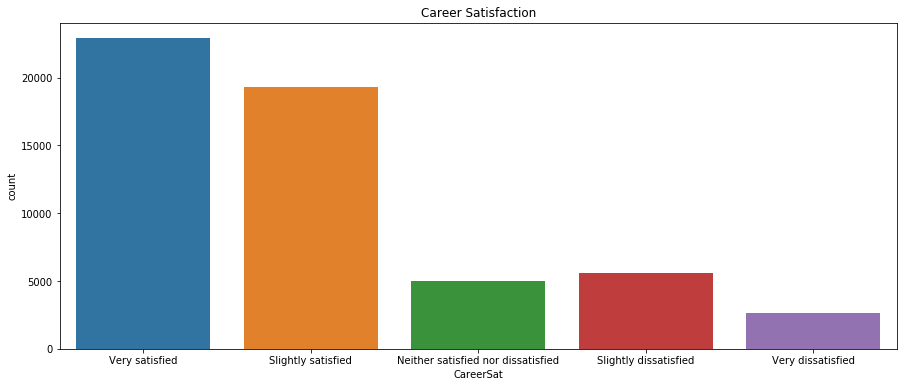

In [6]:
fig, ax = plt.subplots(1,1,figsize =(15,6))

ax.title.set_text('Career Satisfaction')
sns.countplot(careerSat_data['CareerSat'] ,order=['Very satisfied', 
                                                  'Slightly satisfied', 
                                                  'Neither satisfied nor dissatisfied',
                                                  'Slightly dissatisfied',
                                                  'Very dissatisfied'], ax = ax)



In [7]:
satisfaied_devs_perc = careerSat_data[careerSat_data['CareerSat'].isin(
    ['Very satisfied', 'Slightly satisfied'])].shape[0] / careerSat_data.shape[0] * 100
satisfaied_devs_perc

76.15558162620702

### Result

From the above plot we can till that most developers are satisfied with career path, to validate the result we calculated the percentage of satisfied developers over the whole sample, thus we can say that most developers are satisfied with thier career.

## Q2: who are the most satisfied ones? (job titles)

### Prepare Data

We will encode the values into 0 1 encoding in order to be able to calculate the satisfaction mean. For this reason we need to deal with NA values first. The devType column can have multiple combinations of devTypes which means if we impute it, more than one hot encoded column could be affected. Thus, we would rather drop them and then convert it to multiple ont hot encoded columns.

In [8]:
jobs_data = careerSat_data[~ careerSat_data['DevType'].isna()].copy()
DevTyps = ['Academic researcher', 'Data or business analyst', 
           'Data scientist or machine learning specialist','Database administrator', 
           'Designer', 'Developer, back-end', 'Developer, desktop or enterprise applications',
           'Developer, embedded applications or devices', 'Developer, front-end',
           'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 
           'Developer, QA or test','DevOps specialist','Educator', 'Engineer, data',
           'Engineer, site reliability','Engineering manager', 'Marketing or sales professional',
           'Product manager', 'Scientist', 'Senior executive/VP', 'Student', 'System administrator']
for devType in DevTyps:
    jobs_data[devType]=0
for i, row in jobs_data.iterrows():
    for value in row['DevType'].split(';'):
        if value != 'Other':
            jobs_data.loc[i, value] = 1
        

In [9]:
satisfaction_dict = {'Very satisfied':2, 
                     'Slightly satisfied':1, 
                     'Neither satisfied nor dissatisfied':0, 
                     'Slightly dissatisfied':-1,
                     'Very dissatisfied':-2}
jobs_data['CareerSat']= jobs_data['CareerSat'].apply(lambda x : satisfaction_dict[x])

### Model Data

In [10]:
def get_careerSat_mean(df):
    """
    Returns the mean of career satisfaction in the recieved dataset.
    Args:
        df: pandas dataframe that contains CareerSat column.
    Returns:
        Career satisfaction mean.
    """
    return df['CareerSat'].mean()

In [11]:
sat_list = pd.Series()
for devType in DevTyps:
    sat_list[devType] = get_careerSat_mean(jobs_data[jobs_data[devType] == 1])
sat_list = sat_list.sort_values(ascending = False )

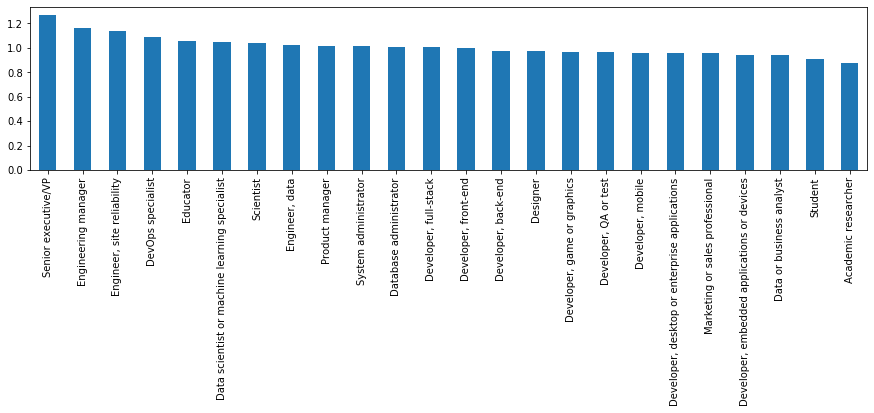

In [12]:
plt.subplots(1,1,figsize =(15,3))
sat_list.plot.bar()

In [13]:
#Top 3
sat_list.sort_values(ascending=False)[:3]

Senior executive/VP           1.272727
Engineering manager           1.163529
Engineer, site reliability    1.142326
dtype: float64

### Result

By calculating the satisfaction mean, we find that most of the people working excutive and managerial levels are satisfied with thier career.

### Q3: Is compensation is the reason of career satisfaction?

### Prepare Data

First we'll unify compensation frequency. And since the number of NA values is small we'll drop them to make sure we don't lose the integrity of the data.

In [14]:
jobs_data = jobs_data[(~jobs_data['CompFreq'].isna()) & (~jobs_data['CompTotal'].isna())]

In [15]:
for i, row in jobs_data.iterrows():
    if row['CompFreq'] == "Yearly":
        jobs_data.loc[i, 'MonthlyCompTotal'] = row['CompTotal']/12
    elif row['CompFreq'] == "Weekly":
        jobs_data.loc[i, 'MonthlyCompTotal'] = row['CompTotal']* 4
    else :
        jobs_data.loc[i, 'MonthlyCompTotal'] = row['CompTotal']

### Model Data

Null Hypothesis: There is no relationship between career satisfaction and compensation.

Alternative Hypothesis: There is a high correlation between career satisfaction and compensation.

In order to test the hypothesis, we will extracted 2 subsets of the data based on monthly compensation values, one for those with low compensation(less than 75% of the population) and the other one for the developers with high compensation (above than 75% of the developers). 

In [16]:
q1 = jobs_data['MonthlyCompTotal'].quantile(0.25)
q3 = jobs_data['MonthlyCompTotal'].quantile(0.75)

low_comp = jobs_data[jobs_data['MonthlyCompTotal']< q1]
high_comp = jobs_data[jobs_data['MonthlyCompTotal'] > q3]

In [17]:
# Calculate the observed difference on average Career Satisfaction rating between the two subsets
s1_mean = get_careerSat_mean(low_comp)
s2_mean = get_careerSat_mean(high_comp)
obs_diff = s2_mean - s1_mean
obs_diff

0.04235807856992413

In [18]:
# Bootstrapping (simulating null distibution)
rand_diffs = []
size = 5000
for i in range(10000):
    sample1 = jobs_data.sample(size)
    sample2 = jobs_data.sample(size)
    sample1_mean = get_careerSat_mean(sample1)
    sample2_mean = get_careerSat_mean(sample2)
    rand_diffs.append(sample1_mean - sample2_mean)
rand_diffs = np.array(rand_diffs)

In [19]:
rand_diffs.mean()

-0.00028532000000000053

Text(0.5, 1.0, 'Null distibution with the observed mean')

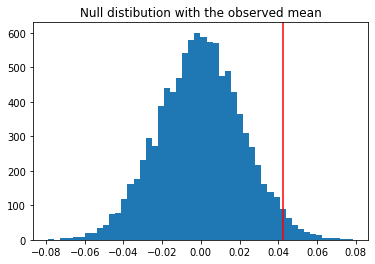

In [20]:
# Plot the null distibution
plt.hist(rand_diffs, bins=50)
plt.axvline(obs_diff, c='red')
plt.title('Null distibution with the observed mean')



In [21]:
# p-value
(rand_diffs > obs_diff).mean()

0.025

### Result

Since the observed difference was significatly larger than random and since to the calculated p value is smaller than 0.05, we can say that compensation is significatly related to career satisfaction.